<a href="https://colab.research.google.com/github/awr7/Machine-Learning-Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
*   By: Angel Rosario

# About This Project


In this project, I apply foundational data analysis techniques to explore the Boston Housing dataset, a classic in machine learning for regression analysis. The focus is on solving linear equations and implementing linear regression to fit a model to data points, demonstrating basic yet essential analytical skills. Further, the project involves exploring key statistical aspects of the dataset such as median, variance, and distribution of specific features like crime rates and pupil-teacher ratios. Custom functions are developed to query the dataset based on specific criteria, like age of houses and tax rates, showcasing practical data manipulation skills.

-----------------------

Imports

In [ ]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from scipy import stats
import matplotlib.pyplot as plt


-----

# Part 1: Linear Equations and Regression

---
## Experiment 1

Simple code for solving a system of four linear equations with 4 unknowns. Solving the following problem: <br>
$x_1 + 2x_2 + 3x_3 + 5x_4 = 10$<br>
$4x_1 + 4x_2 + 5x_3 + 3x_4=4$<br>
$3x_1 + 8x_2 + 9x_3 + x_4= 3$<br>
$x_1 + x_2 + 3x_3 = 7$<br><br>

Afterwards, we check results with allclose( ) function. And print out x.

<b>Expected result</b><br>x = array([-1.17857143, -3.875     ,  4.01785714,  1.375     ])


In [ ]:

a = np.array([[1, 2, 3, 5], [4, 4, 5, 3], [3, 8, 9, 1], [1, 1, 3, 0]])
b = np.array([10, 4, 3, 7])
x = np.linalg.solve(a, b)


In [ ]:
np.allclose(np.dot(a, x), b)
x

array([-1.17857143, -3.875     ,  4.01785714,  1.375     ])



---


## Linear regression
The code below creates a random scattering of datapoints around a line.

We use normal equations to compute a line which has the best fit to all points in the least-quares sense and then plot the line and data points.

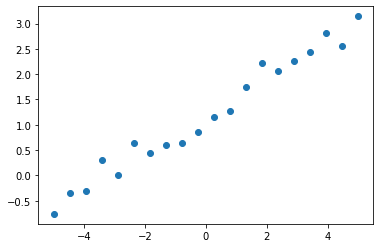

In [ ]:
# generate data on a line perturbed with some noise
noise_margin= 0.76

# w[0] is random constant term (offset from origin)
# w[1] is random linear term (slope)
w = rand(2,1)
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise_margin * rand(len(x))

# create the design matrix X: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1)] )

# visualize the data
plt.scatter(x, y)
plt.show()

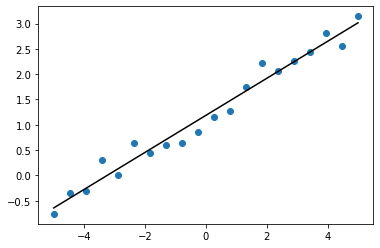

In [ ]:
#transpose the design matrix
t = X.transpose()

#calculate the result of the normal equation
result = np.dot(np.dot(np.linalg.inv(np.dot(t, X)), t), y)

# calculate the fitted line
fitted_line = np.dot(X, result)

#visualize the data and the line
plt.scatter(x, y)
plt.plot(x, fitted_line, 'black')
plt.show()

-----


# Part 2: Exploring a Data Set


## Loading the data set

In [ ]:
from sklearn.datasets import load_boston
ds = load_boston()
samples, label, feature_names = ds.data, ds.target, ds.feature_names
print(samples.shape)
print(feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Data description
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# check to see if there is any null data
np.isnan(np.sum(samples))

False

In [ ]:
# set print options to make things look nicer
np.set_printoptions(suppress=True, linewidth=125)

In [ ]:
# find median, variance of the data and put it out in nice looking format
median = np.round(np.median(samples, axis=0), decimals=1)
variance = np.round(np.var(samples, axis=0), decimals=1)
basic_stats = np.vstack((median, variance))
basic_stats_label = ['  median','variance']
print('\t\tCRIM\tZN\tINDUS\tCHAS\tNOX\tRM\tAGE\tDIS\tRAD\tTAX\tPTRATIO\tB\tLSTAT')
for basic_stats_label, row in zip(basic_stats_label, basic_stats):
    print('{} [\t{}]'.format(basic_stats_label,"".join('%s\t'%i for i in row)))

		CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
  median [	0.3	0.0	9.7	0.0	0.5	6.2	77.5	3.2	5.0	330.0	19.0	391.4	11.4	]
variance [	73.8	542.9	47.0	0.1	0.0	0.5	790.8	4.4	75.7	28348.6	4.7	8318.3	50.9	]


---
## Experiment 3

Retrieve the `max` `min` and `average` of samples using function <code>stats.describe</code>


In [ ]:
# your code goes here:

#holds the result of calling the stats.describe function
basic_stats_data = stats.describe(samples)

# retrieve the max min and avg
maximum = np.round(basic_stats_data.minmax[1], decimals=1)
minimum = np.round(basic_stats_data.minmax[0], decimals=1)
average = np.round(np.mean(samples, axis=0),decimals =1)

# stack the desired values into a matrix
basic_stats = np.vstack((maximum, minimum, average))

# give labels to the data
basic_stats_label = ['maximum', 'minimum', 'average']

# print the values in a nice looking format
print('\t\tCRIM\tZN\tINDUS\tCHAS\tNOX\tRM\tAGE\tDIS\tRAD\tTAX\tPTRATIO\tB\tLSTAT')
for basic_stats_label, row in zip(basic_stats_label, basic_stats):
    print('{} [\t{}]'.format(basic_stats_label,"".join('%s\t'%i for i in row)))

		CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
maximum [	89.0	100.0	27.7	1.0	0.9	8.8	100.0	12.1	24.0	711.0	22.0	396.9	38.0	]
minimum [	0.0	0.0	0.5	0.0	0.4	3.6	2.9	1.1	1.0	187.0	12.6	0.3	1.7	]
average [	3.6	11.4	11.1	0.1	0.6	6.3	68.6	3.8	9.5	408.2	18.5	356.7	12.7	]


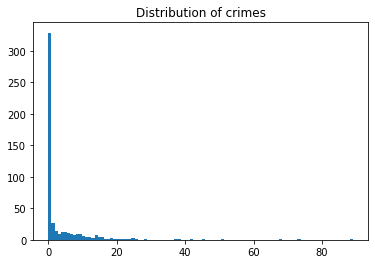

Bin sizes: [329.  26.  14.   9.  13.  12.  11.   9.   8.   9.   9.   6.   5.   4.   3.   7.   4.   4.   1.   1.   3.   1.   1.   1.
   1.   1.   1.   3.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   1.   0.
   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.]


In [ ]:
import matplotlib.pyplot as plt

# let plot out to see what is the distribution of crime based on the data
n, bins, patches = plt.hist(samples[:,0],bins='auto')
plt.title('Distribution of crimes')
plt.show()
print('Bin sizes: {}'.format(n))




---


## Experiment 4




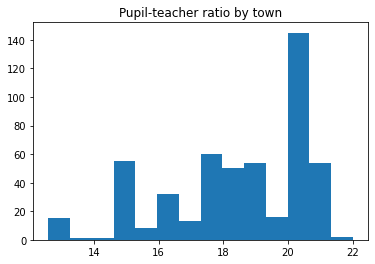

Bin sizes: [ 15.   1.   1.  55.   8.  32.  13.  60.  50.  54.  16. 145.  54.   2.]


In [ ]:
# your code goes here:
n, bins, patches = plt.hist(samples[:, 10], bins='auto')
plt.title('Pupil-teacher ratio by town')
plt.show()
print('Bin sizes: {}'.format(n))

---
## Experiment 5

In [ ]:
def house_with_defined_age(dataset,age):
    '''This function will return indices of all house with proportion of owner-occupied units built prior to 1940 greater than age%'''
    ids = []
    for id, record in enumerate(dataset):
        if record[6]>age:
            ids.append(id)
    return ids


# list out all records with unites built prior to 1940 greater than 50%
samples[house_with_defined_age(samples,50)]


array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,   4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,   9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,   4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,   5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,   6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,   7.88   ]])

In [ ]:
def house_with_defined_tax(dataset, a, b):
    ids = []
    for id, record in enumerate(dataset):
        if record[9] < a or record[9] > b:
            ids.append(id)
    return ids

In [ ]:
# list out all records with tax either less than 100 or more than 500
a = 100
b = 500
samples[house_with_defined_tax(samples,a, b)]

array([[  8.98296,   0.     ,  18.1    , ...,  20.2    , 377.73   ,  17.6    ],
       [  3.8497 ,   0.     ,  18.1    , ...,  20.2    , 391.34   ,  13.27   ],
       [  5.20177,   0.     ,  18.1    , ...,  20.2    , 395.43   ,  11.48   ],
       ...,
       [  0.20746,   0.     ,  27.74   , ...,  20.1    , 318.43   ,  29.68   ],
       [  0.10574,   0.     ,  27.74   , ...,  20.1    , 390.11   ,  18.07   ],
       [  0.11132,   0.     ,  27.74   , ...,  20.1    , 396.9    ,  13.35   ]])